- https://www.kaggle.com/code/glebbuzin/rmetrics22dec
- https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a
- https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
- https://www.kaggle.com/code/mechatronixs/prediction-with-7-classification-models-roc-auc (*) 
- https://www.kaggle.com/code/maartenvandevelde/london-bike-share-prophet-xgb-lstm (*)
- https://www.kaggle.com/code/maartenvandevelde/customer-churn-eda-modelling-92-recall

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Metric model (classification)

- Classificator: kNN
- Dataset: https://archive.ics.uci.edu/dataset/1/abalone

### Dataset

Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

In [29]:
df = pd.read_csv('/kaggle/input/dataset-abalobe-2/abalone_dataset.csv')
df.head(5)

,sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [30]:
df.info()
print('----------------------------------------------------')
print('\n','targets: ',df['Rings'].unique())
print('\n','sex: ',df['sex'].unique())
print('\n','isnul ----------------------------------------------------')
print(df.isnull().sum())
print('\n','isna ----------------------------------------------------')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
----------------------------------------------------

 targets:  [15  7  9 10  8 20 16 19 14 11 12 18 13  5  4  6 21 17 22  1  3 26 23 29
  2 27 25 24]

 sex:  ['M' 'F' 'I']

 isnul ----------------------------------------------------
sex               0
Length            0
Diameter          0
Height            0
Whole weight      0


- dataset looks relatively clean

### Features and Categories

In [31]:
df['sex_F']=df['sex'].apply(lambda value: (1 if value == 'F' else 0))
df['sex_I']=df['sex'].apply(lambda value: (1 if value == 'I' else 0))
df['sex_M']=df['sex'].apply(lambda value: (1 if value == 'M' else 0))
                            
df['sex_num']= pd.factorize(df['sex'])[0] + 1
df.head(5)

,sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,sex_F,sex_I,sex_M,sex_num
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0,3


In [32]:
df['class1'] = df['Rings'].apply(lambda value: (1 if value <= 9 else 2) if value <= 18 else 3)
df['class1'] = pd.Categorical(df['class1'], categories=[1,2,3])
print(df['class1'].value_counts())


df['class2'] = df['Rings'].apply(lambda value: (1 if value <= 9 else 2))
df['class2'] = pd.Categorical(df['class2'], categories=[1,2])
print(df['class2'].value_counts())



class1
1    2096
2    1987
3      94
Name: count, dtype: int64
class2
1    2096
2    2081
Name: count, dtype: int64


In [33]:
features=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','sex_I','sex_M','sex_F']
features2=['sex_num','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


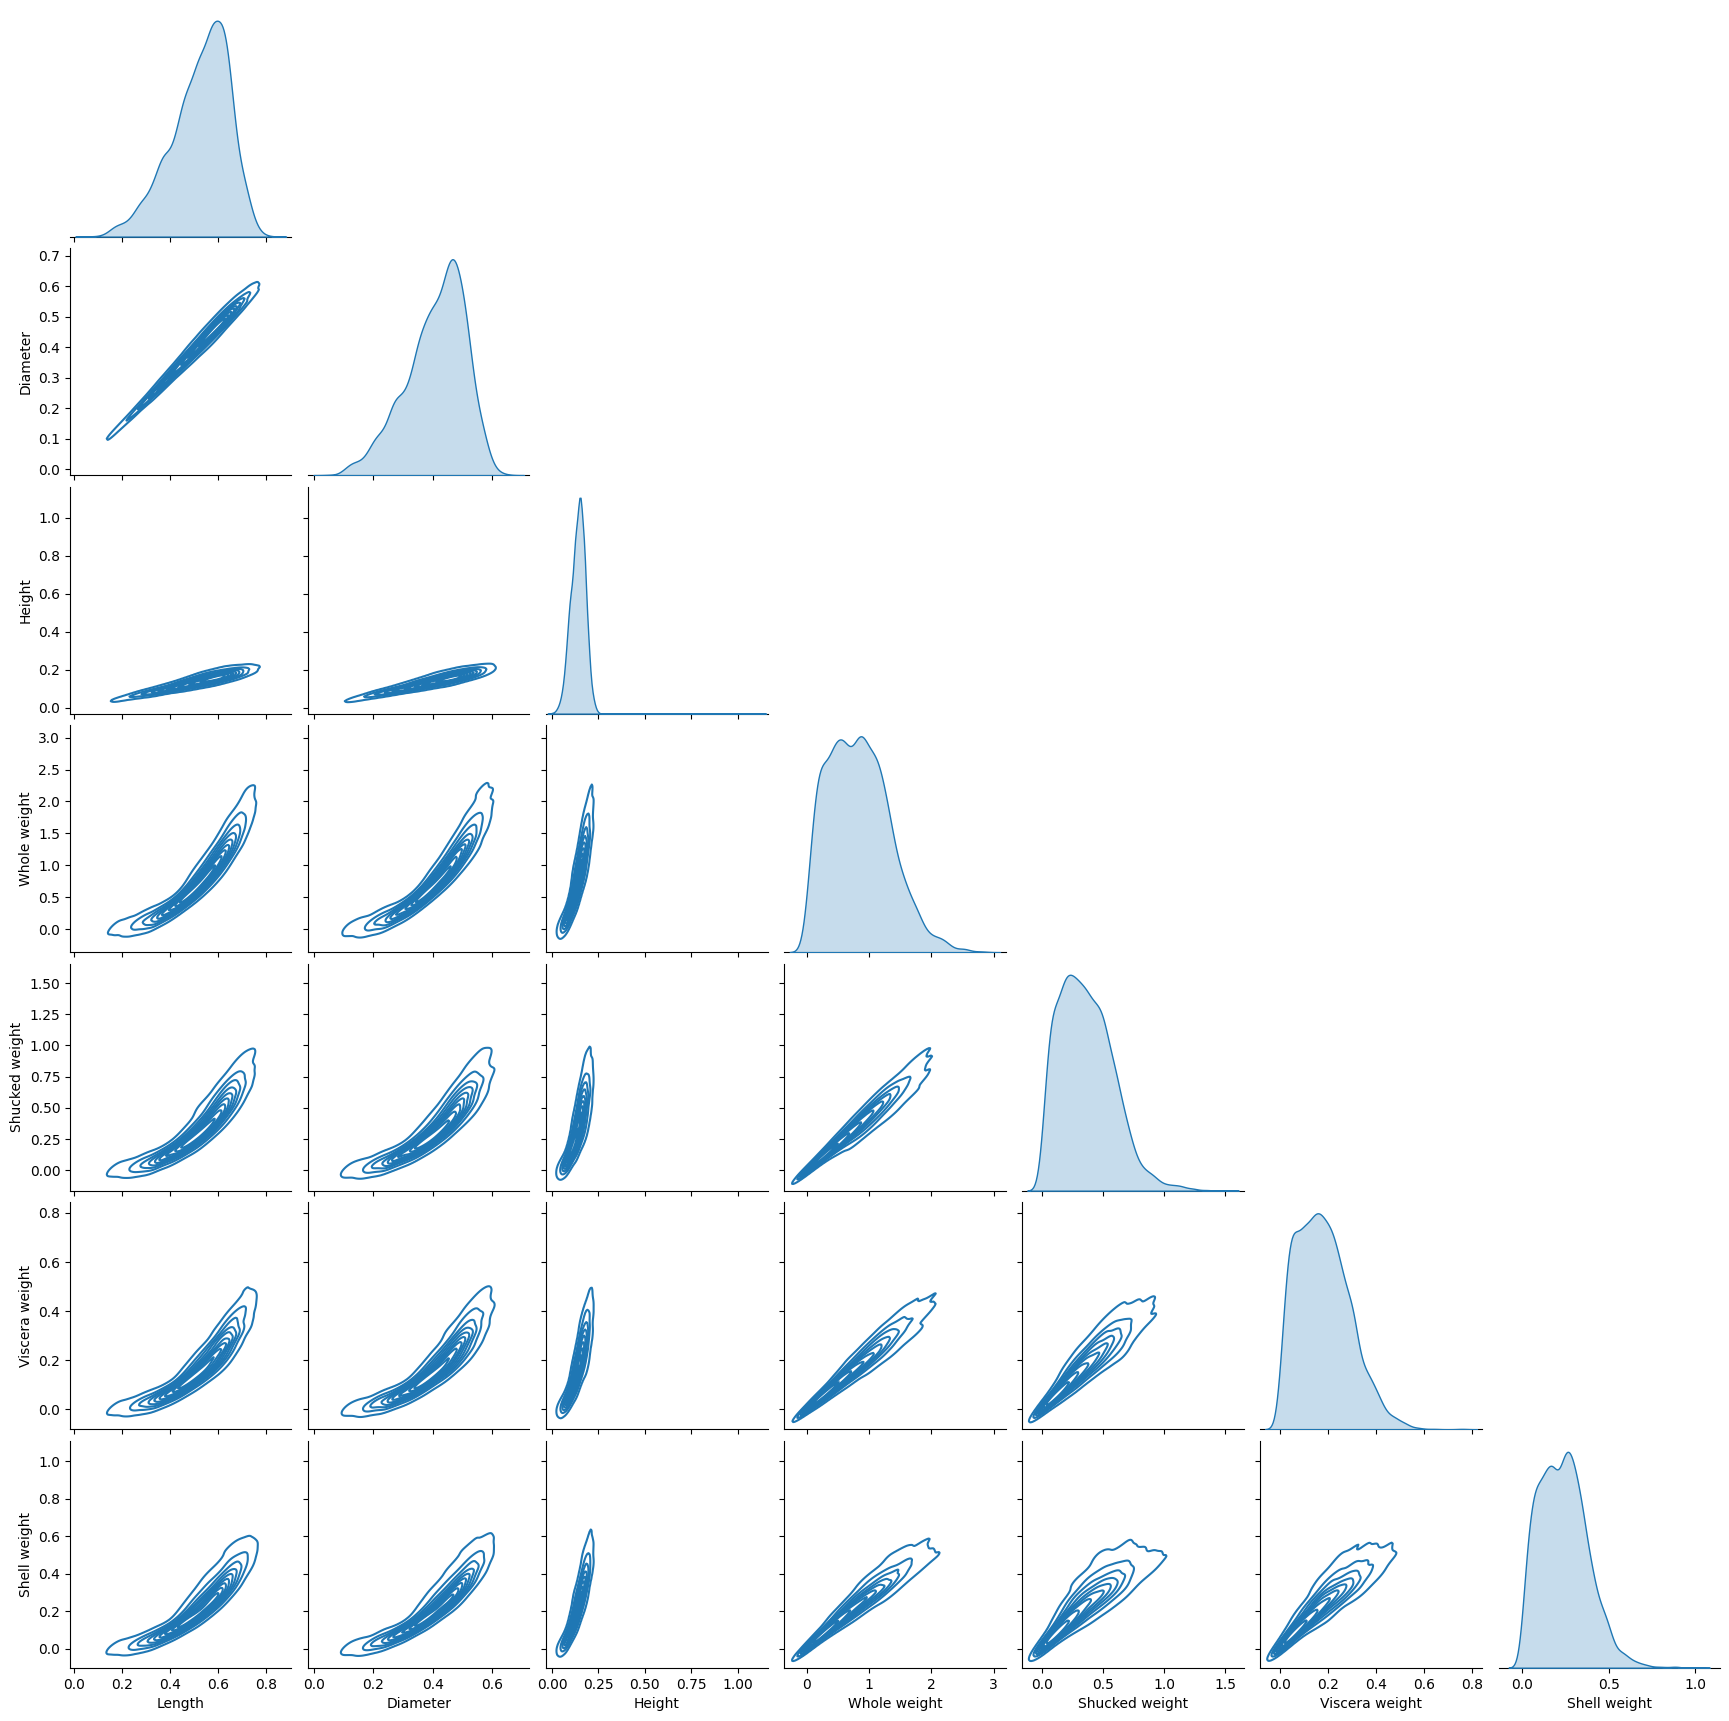

In [29]:
#sns.pairplot(df[features], kind="kde",corner=True)

- good correlation can be observed between all features. 
- all fearures have almost gaussian distribution and match well

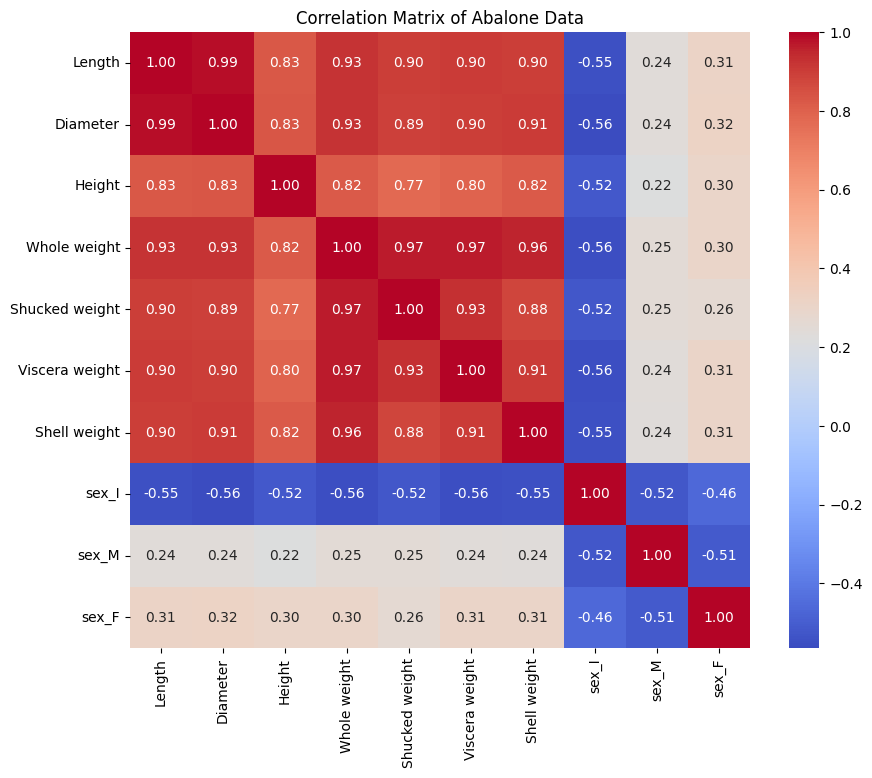

In [34]:
corr = df[features].select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Abalone Data')
plt.show()

- it can be seen that hight correlates worse 

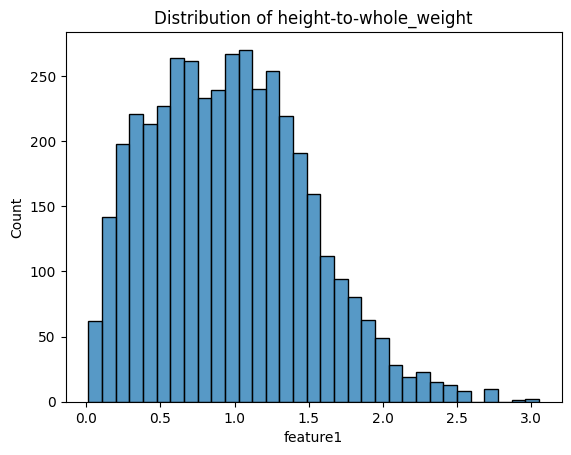

In [35]:
#df['feature1'] = (np.log(df['Whole weight'] / df['Height']))
df['feature1'] = ((df['Whole weight'] + df['Height']))


ax = sns.histplot(data=df, x="feature1")
ax.set_title(f"Distribution of height-to-whole_weight")
plt.show()

- we can clean a bit our new feature

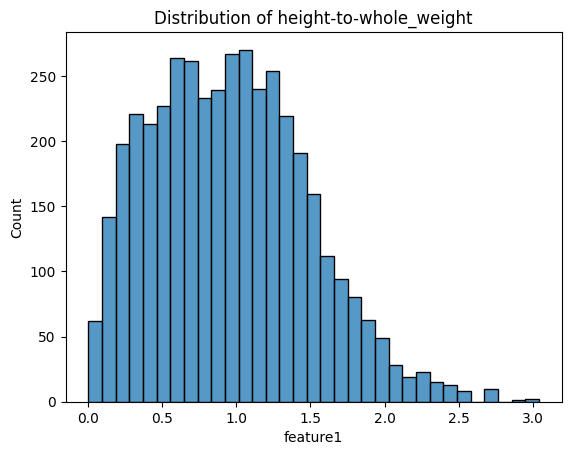

In [36]:
df['feature1'].replace([np.inf, -np.inf], 0, inplace=True)
df['feature1']=np.float64(df['feature1'])


df['feature1']=df['feature1']-df['feature1'].min()

ax = sns.histplot(data=df, x="feature1")
ax.set_title(f"Distribution of height-to-whole_weight")
plt.show()

In [12]:
# features=['sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','feature1']
print(df[features].info())
print(df[features2].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   sex_I           4177 non-null   int64  
 8   sex_M           4177 non-null   int64  
 9   sex_F           4177 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 326.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex_num         4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diame

## Training and test set

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing importxc23212q
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve

norm = MinMaxScaler()
#norm = StandardScaler()
pca = PCA(n_components=5)



df_scaled = norm.fit_transform(df[features])
df_pca = pca.fit_transform(df[features])

#df_scaled = norm.fit_transform(df[features2])
#df_pca = pca.fit_transform(df[features2])

#df_scaled = norm.fit_transform(df[features2])
#df_pca = pca.fit_transform(df[features2])

X1_train, X1_test, y1_train, y1_test = train_test_split(df_scaled, df['Rings'], test_size=0.2, random_state=42) # model1
X2_train, X2_test, y2_train, y2_test = train_test_split(df_scaled, df['class1'], test_size=0.2, random_state=42) # model2
X3_train, X3_test, y3_train, y3_test = train_test_split(df_scaled, df['class2'], test_size=0.2, random_state=42) #model3
X4_train, X4_test, y4_train, y4_test = train_test_split(df_pca, df['class2'], test_size=0.1, random_state=42) #model4


## Training model

In [46]:
# Initialize the k-NN classifier
#knn = KNeighborsClassifier(n_neighbors=16)
knn = KNeighborsClassifier(n_neighbors=16,weights='distance')

# Fit the model
knn.fit(X4_train, y4_train)

# Make predictions
y_pred = knn.predict(X4_test)


# Evaluate the model
accuracy = accuracy_score(y4_test, y_pred)
mse = mean_squared_error(y4_test, y_pred)
r2 = r2_score(y4_test, y_pred)
RMSE=np.sqrt(mse)

print('accuracy: ',round(accuracy,4))
print('mse: ',round(mse,4))
print('R2: ',round(r2,4))
print('RMSE: ',round(RMSE,4))
print(classification_report(y4_test,y_pred))

accuracy:  0.8182
mse:  0.1818
R2:  0.2719
RMSE:  0.4264
              precision    recall  f1-score   support

           1       0.83      0.82      0.82       216
           2       0.81      0.82      0.81       202

    accuracy                           0.82       418
   macro avg       0.82      0.82      0.82       418
weighted avg       0.82      0.82      0.82       418



accuarcy (features, MinMaxScaler):

- model1 + knn(16): 0.2403
- model2 + knn(16): 0.7667
- model3 + knn(16): 0.0.7918
- model4 (n_components=2) + knn(5) + test_size=0.2: 0.6973
- model4 (n_components=5) + knn(5) + test_size=0.2: 0.7787
- model4 (n_components=5) + knn(16) + test_size=0.2: 0.7966
- model4 (n_components=5) + knn(16) + test_size=0.1: 0.8134
- model4 (n_components=5) + knn(16) + test_size=0.1 + weights: 0.8182

we can notice that PCA improved classification

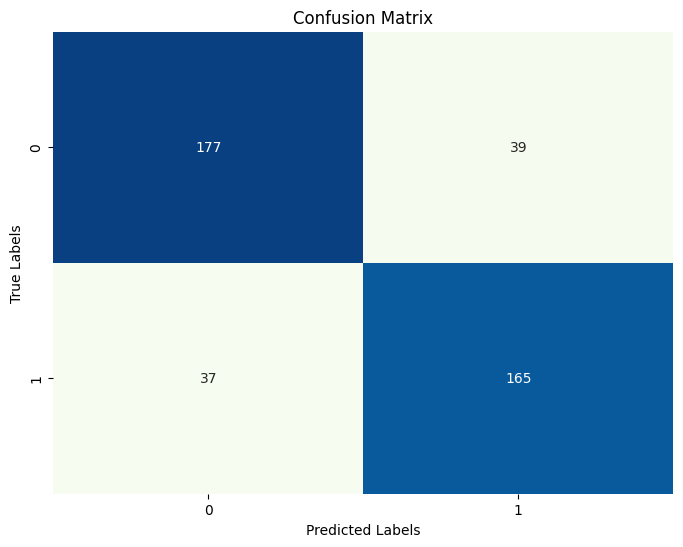

In [39]:
# Create a confusion matrix
cm = confusion_matrix(y4_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="GnBu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

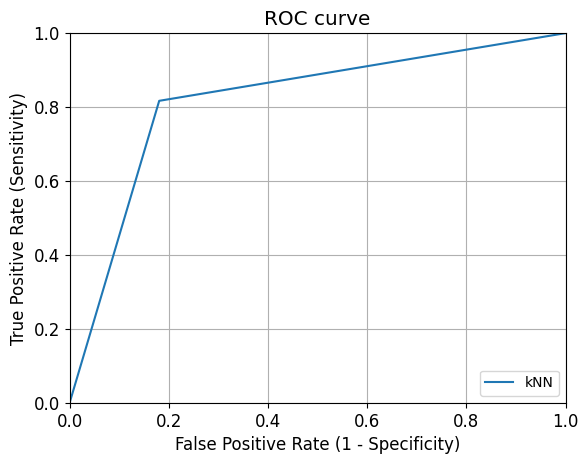

In [68]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

roc_auc_score(y4_test,y_pred)

ns_fpr, ns_tpr, _ = roc_curve(y4_test, y_pred, pos_label=1)

plt.plot(ns_tpr, ns_fpr, label="kNN")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

### Hyperparameters tuning

In [54]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,25)}

knn = KNeighborsClassifier(weights='distance')
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X4_train, y4_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [56]:
knn_cv.best_score_

0.7893043318129019

# Conclusion


the best classification accuracy was obtained using the following parameters:
- PCA with n_components=5
- kNN with n_neighbors=16
- 10% split for validation
- using weights